# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> No Show Appointment: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

> The first question: I would like to know the number of No-Show patients in each hospitals. Also, I will use the number of No-show divided by total patient to demonstratate the No-Show rate in each hospitals.

> The second question: In this question, I would to know the trend of No-Show peoples in each months.

> The third question: I would like to know how important for each factors will effect to a patient who show up.

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [180]:
# Load the dataset

df = pd.read_csv('noshowappointments.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [181]:
# Check the shape of dataset

df.shape

(110527, 14)

In [182]:
# Check type of each columns in dataset

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [183]:
# Check duplicated

df.duplicated().sum()

0

In [184]:
# Check information and missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

> drop the unnecessory column and rename the column to lowercase

In [185]:
# drop unecessory column

df.drop(columns=["PatientId","AppointmentID"], inplace=True)
df.head()

Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  No-show  
0      No  
1      No  
2      No  
3      No  
4      No

In [186]:
# replace "-" with "_" and lowercase labels

df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head()

gender          scheduledday        appointmentday  age      neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  no_show  
0      No  
1      No  
2      No  
3      No  
4      No

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Which hospital have the most number of patient who did not show up?

Explore the number of patient who did not show up in each hospitals.

In [187]:
neighbourhood = df.groupby(['no_show','neighbourhood']).count()['age']
neighbourhood

no_show  neighbourhood      
No       AEROPORTO                 7
         ANDORINHAS             1741
         ANTÔNIO HONÓRIO         221
         ARIOVALDO FAVALESSA     220
         BARRO VERMELHO          332
         BELA VISTA             1523
         BENTO FERREIRA          665
         BOA VISTA               254
         BONFIM                 2223
         CARATOÍRA              1974
         CENTRO                 2631
         COMDUSA                 254
         CONQUISTA               689
         CONSOLAÇÃO             1139
         CRUZAMENTO             1094
         DA PENHA               1788
         DE LOURDES              258
         DO CABRAL               472
         DO MOSCOSO              321
         DO QUADRO               709
         ENSEADA DO SUÁ          183
         ESTRELINHA              432
         FONTE GRANDE            533
         FORTE SÃO JOÃO         1543
         FRADINHOS               210
         GOIABEIRAS              563
         

Find the proportion of no show up patients in each hospital

In [188]:
show_neighbourhood = neighbourhood['No']
no_show_neighbourhood = neighbourhood['Yes']

#Total
total = df.groupby(['neighbourhood']).count()['age']

#Proportion of No show up
prop_no_show = no_show_neighbourhood/total

Plot the Bar Chart for each hospital

In [189]:
ind = np.arange(len(prop_no_show))  # the x locations for the groups
width = 0.8      # the width of the bars

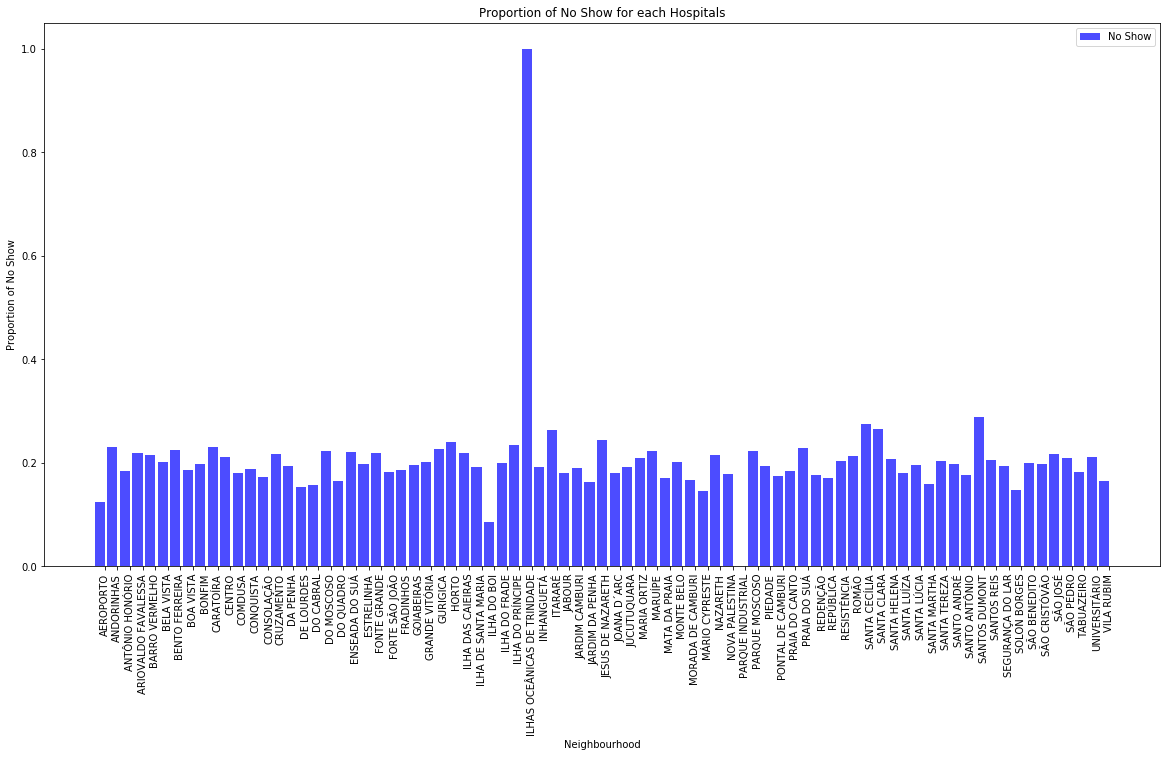

In [190]:
# plot bars
plt.figure(figsize=(20,10))
no_show_bars = plt.bar(ind, prop_no_show, width, color='b', alpha=.7, label='No Show')

# title and labels
plt.ylabel('Proportion of No Show')
plt.xlabel('Neighbourhood')
plt.title('Proportion of No Show for each Hospitals')
locations = ind + width / 2  # xtick locations
labels = prop_no_show.index  # xtick labels
plt.xticks(locations, labels, rotation = 90, size = 10)

# legend
plt.legend()

In [191]:
prop_no_show.idxmax()

'ILHAS OCEÂNICAS DE TRINDADE'

### Research Question 2  How about the trend of number of patient who did not show up in each month?

Split the scheduleday column to date and time

In [192]:
df[['scheduled_date','scheduled_time']] = df['scheduledday'].str.split("T", expand = True)
df.head()

gender          scheduledday        appointmentday  age      neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  no_show scheduled_date scheduled_time  
0      No     2016-04-29      18:38:08Z  
1      No     2016-04-29      16:08:27Z  
2      No     2016-04-29      16:19:04Z  
3      No     2016-04-29      17:29:31Z  
4      No     2016-04-29      16:07:23Z

Then, split the date to year, month and day

In [193]:
df[['scheduled_date_year','scheduled_date_month','scheduled_date_day']] = df['scheduled_date'].str.split("-", expand = True)
df.head()

gender          scheduledday        appointmentday  age      neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   scholarship  hipertension  diabetes  alcoholism  handcap  sms_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  no_show scheduled_date scheduled_time scheduled_date_year  \
0      No     2016-04-29      18:38:08Z                2016   
1      No     2016-04-29      16:08:27Z                2016   
2      No     2016-04-29      16:19:04Z                2016   
3      No     2016-04-29      17:29:31Z                2016   
4      No     2016-04-29      16:07:23Z                2016   

  scheduled_date_month scheduled_date_day  
0                   04                 29  
1                   04                 29  
2                   04                 29  
3                   04                 29  
4                   04                 29

In [194]:
# groupby and count

date = df.groupby(['no_show','scheduled_date_year','scheduled_date_month']).count()['age']
date

no_show  scheduled_date_year  scheduled_date_month
No       2015                 11                          1
                              12                         42
         2016                 01                         42
                              02                        199
                              03                       2418
                              04                      17490
                              05                      55652
                              06                      12364
Yes      2015                 12                         19
         2016                 01                         18
                              02                         82
                              03                       1196
                              04                       7849
                              05                      11769
                              06                       1386
Name: age, dtype: int64

In [195]:
# Prepare the dataset for plotting

no_show_date = date['Yes']
no_show_date

scheduled_date_year  scheduled_date_month
2015                 12                         19
2016                 01                         18
                     02                         82
                     03                       1196
                     04                       7849
                     05                      11769
                     06                       1386
Name: age, dtype: int64

Plot the graph

Text(0,0.5,'Number of No Show Up')

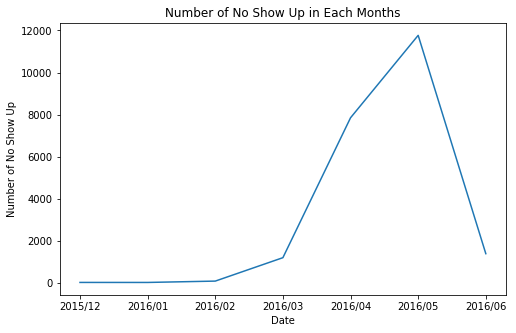

In [196]:
plt.subplots(figsize=(8, 5))
names = ['2015/12','2016/01','2016/02','2016/03','2016/04','2016/05','2016/06']
values = no_show_date.values
plt.plot(names,values)
plt.title('Number of No Show Up in Each Months')
plt.xlabel('Date')
plt.ylabel('Number of No Show Up')

### Research Question 3  Which factors are important to a patient will show up?

Filter the patients who showed up for thier appointment

In [197]:
show_df = df.query("no_show == 'No'")
show_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88208 entries, 0 to 110526
Data columns (total 17 columns):
gender                  88208 non-null object
scheduledday            88208 non-null object
appointmentday          88208 non-null object
age                     88208 non-null int64
neighbourhood           88208 non-null object
scholarship             88208 non-null int64
hipertension            88208 non-null int64
diabetes                88208 non-null int64
alcoholism              88208 non-null int64
handcap                 88208 non-null int64
sms_received            88208 non-null int64
no_show                 88208 non-null object
scheduled_date          88208 non-null object
scheduled_time          88208 non-null object
scheduled_date_year     88208 non-null object
scheduled_date_month    88208 non-null object
scheduled_date_day      88208 non-null object
dtypes: int64(7), object(10)
memory usage: 12.1+ MB


Count the number of patient who show up and find the proportion.

In [198]:
sch = show_df.groupby('scholarship').count()['gender']
prop_sch = sch[1]/88208
prop_sch

0.093903047342644652

In [199]:
hip = show_df.groupby('hipertension').count()['gender']
prop_hip = hip[1]/88208
prop_hip

0.20439189189189189

In [200]:
dia = show_df.groupby('diabetes').count()['gender']
prop_dia = dia[1]/88208
prop_dia

0.073836840195900602

In [201]:
alc = show_df.groupby('alcoholism').count()['gender']
prop_alc = alc[1]/88208
prop_alc

0.030416742245601307

In [202]:
sms = show_df.groupby('sms_received').count()['gender']
prop_sms = sms[1]/88208
prop_sms

0.29133411935425357

Plot Bar chart for each factors

In [203]:
ind = np.arange(0,1)  # the x locations for the groups
width = 0.35       # the width of the bars

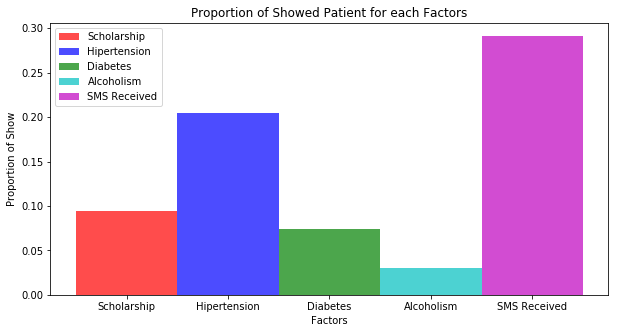

In [204]:
# plot bars
plt.figure(figsize=(10,5))
sch_bar = plt.bar(ind, prop_sch, width, color='r', alpha=.7, label='Scholarship')
hip_bars = plt.bar(ind + width, prop_hip, width, color='b', alpha=.7, label='Hipertension')
dia_bars = plt.bar(ind + 2*width, prop_dia, width, color='g', alpha=.7, label='Diabetes')
alc_bars = plt.bar(ind + 3*width, prop_alc, width, color='c', alpha=.7, label='Alcoholism')
sms_bars = plt.bar(ind + 4*width, prop_sms, width, color='m', alpha=.7, label='SMS Received')

# title and labels
plt.ylabel('Proportion of Show')
plt.xlabel('Factors')
plt.title('Proportion of Showed Patient for each Factors')
locations = [ind, ind + width, ind + 2*width, ind + 3*width, ind + 4*width]  # xtick locations
labels = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS Received']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

<a id='conclusions'></a>
## Conclusions

> The hosital where has the most no show-up patients is in "ILHAS OCEÂNICAS DE TRINDADE". Also, we would like to take a look at the trend of no-show up patient in each months. The number of no show-up patheint increased every month since December 2015 until May 2016, and then decreased again in June 2016. The conclusion from the last question showed the proportion of the show up patient for each factors comprising Scholarship, Hipertension, Diabetes, Alcoholism and SMS Recieved.

In [206]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0